In [12]:
from Helper_modules import denoiser, helper_func, import_img, noise
import csv
from itertools import product
import numpy as np

In [13]:
image_path = "/home/arman/Documents/arman/Uni/Master/Semester 3/ip_repository/ImageProcessing/Dataset/train/517_img.png"
image = import_img.load_and_normalize_image(image_path)

In [14]:
gaussian_noisy_image = noise.add_gaussian_noise(image)
salt_und_pepper_noisy_image = noise.add_salt_and_pepper_noise(image)
poisson_noisy_image = noise.add_poisson_noise(image)
speckle_noisy_image = noise.add_speckle_noise(image)

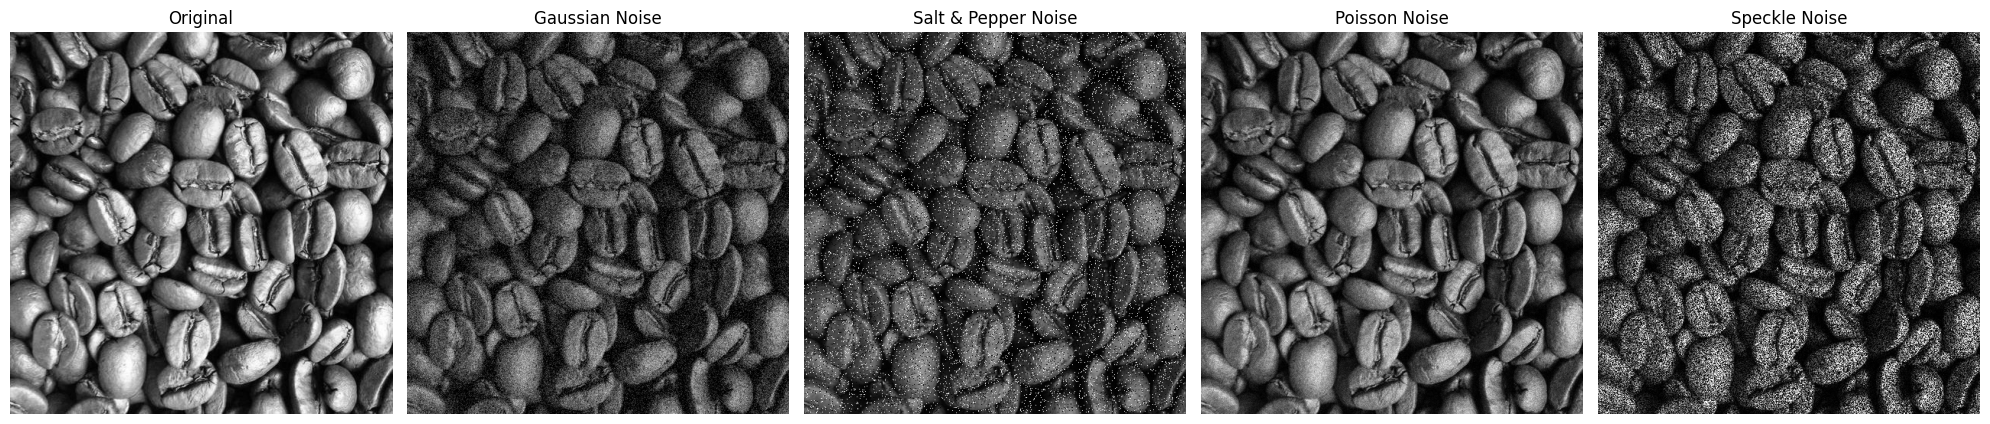

In [15]:
helper_func.plot_noisy_images(image, gaussian_noisy_image, salt_und_pepper_noisy_image, poisson_noisy_image, speckle_noisy_image)

In [16]:
noisy_image = gaussian_noisy_image
denoiser = denoiser.ImageDenoiser(image, noisy_image=noisy_image)

In [17]:
denoised_gaussian = denoiser.denoise_with_gaussian_blur(kernel_size=(3,3), sigmaX=10)

In [18]:
helper_func.calculate_psnr(image, denoised_gaussian)


np.float64(27.908238827109816)

Best PSNR: 27.91 dB
Best Parameters: kernel_size=(3, 3), sigmaX=10


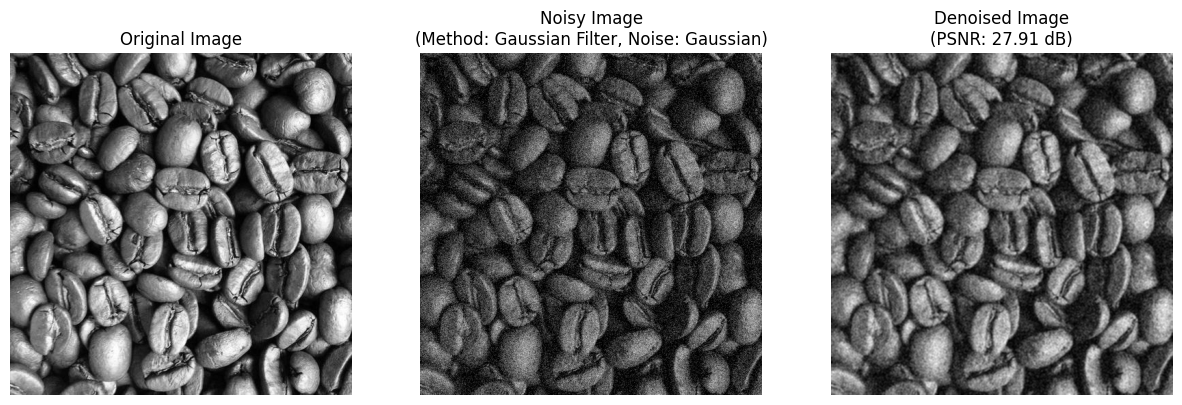

In [19]:
def evaluate_gaussian_denoising(kernel_size, sigmaX):
    # Apply the Gaussian filter with the given hyperparameters
    denoised_image = denoiser.denoise_with_gaussian_blur(
        kernel_size=kernel_size,
        sigmaX=sigmaX
    )
    
    # Calculate PSNR as the performance metric
    psnr_value = helper_func.calculate_psnr(denoised_image, image)  # Adjust original_image as needed
    return psnr_value

# Define ranges for hyperparameters
kernel_sizes = [(size, size) for size in range(3, 10, 2)]  # Generates [(3, 3), (5, 5), (7, 7), (9, 9)]
sigmaX_values = list(range(10, 101, 10))  # Generates [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

best_psnr = -np.inf
best_params = None

# Open a CSV file to write PSNR values
with open('gaussian_gaussian_psnr_results.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    csvwriter = csv.writer(csvfile)
    
    # Write header
    csvwriter.writerow(["Kernel Size", "SigmaX", "PSNR"])
    
    # Generate combinations of all hyperparameters using itertools.product
    for kernel_size, sigmaX in product(kernel_sizes, sigmaX_values):
        psnr_value = evaluate_gaussian_denoising(kernel_size, sigmaX)
        
        # Write the current configuration and PSNR to the file
        csvwriter.writerow([kernel_size, sigmaX, psnr_value])
        
        # Update best PSNR and parameters
        if psnr_value > best_psnr:
            best_psnr = psnr_value
            best_params = (kernel_size, sigmaX)

# Output the best PSNR and parameters
print(f"Best PSNR: {best_psnr:.2f} dB")
print(f"Best Parameters: kernel_size={best_params[0]}, sigmaX={best_params[1]}")

# Use the best parameters to denoise the image
kernel_size = best_params[0]
sigmaX = best_params[1]
method_name = "Gaussian Filter"
noise_type = "Gaussian"

# Denoise the image with the best parameters
denoised_gaussian = denoiser.denoise_with_gaussian_blur(kernel_size=kernel_size, sigmaX=sigmaX)

# Plot the images
helper_func.plot_images(original=image, noisy=noisy_image, denoised_image=denoised_gaussian, method_name=method_name, noise_type=noise_type)


Best PSNR: 28.32 dB
Best Parameters: d=5, sigma_color=100, sigma_space=25


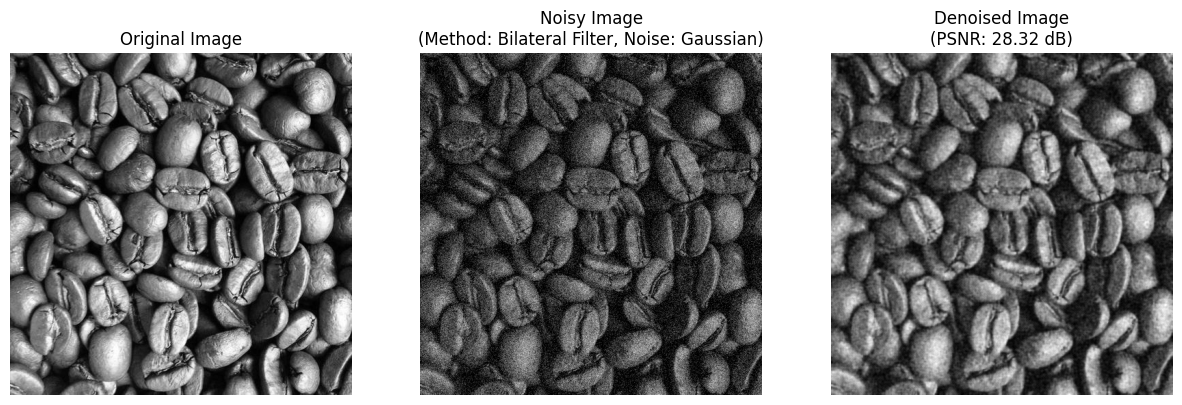

In [20]:
def evaluate_bilateral_denoising(d, sigma_color, sigma_space):
    # Apply the Bilateral filter with the given hyperparameters
    denoised_image = denoiser.denoise_with_bilateral_filter(
        d=d,
        sigma_color=sigma_color,
        sigma_space=sigma_space
    )
    
    # Calculate PSNR as the performance metric
    psnr_value = helper_func.calculate_psnr(denoised_image, image)  # Adjust original_image as needed
    return psnr_value

# Define ranges for hyperparameters
d_values = [3, 5, 7, 9, 11]
sigma_color_values = [25, 50, 75, 100, 125]
sigma_space_values = [25, 50, 75, 100, 125]

best_psnr = -np.inf
best_params = None

# Open a CSV file to write PSNR values
with open('bilateral_psnr_results.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    csvwriter = csv.writer(csvfile)
    
    # Write header
    csvwriter.writerow(["D", "Sigma Color", "Sigma Space", "PSNR"])
    
    # Perform grid search
    for d, sigma_color, sigma_space in product(d_values, sigma_color_values, sigma_space_values):
        psnr_value = evaluate_bilateral_denoising(d, sigma_color, sigma_space)
        
        # Write the current configuration and PSNR to the file
        csvwriter.writerow([d, sigma_color, sigma_space, psnr_value])
        
        # Update best PSNR and parameters
        if psnr_value > best_psnr:
            best_psnr = psnr_value
            best_params = (d, sigma_color, sigma_space)

# Output the best PSNR and parameters
print(f"Best PSNR: {best_psnr:.2f} dB")
print(f"Best Parameters: d={best_params[0]}, sigma_color={best_params[1]}, sigma_space={best_params[2]}")

# Use the best parameters to denoise the image
d = best_params[0]
sigma_color = best_params[1]
sigma_space = best_params[2]
method_name = "Bilateral Filter"
noise_type = "Gaussian"

# Denoise the image with the best parameters
denoised_bilateral = denoiser.denoise_with_bilateral_filter(d=d, sigma_color=sigma_color, sigma_space=sigma_space)

# Plot the images
helper_func.plot_images(original=image, noisy=noisy_image, denoised_image=denoised_bilateral, method_name=method_name, noise_type=noise_type)


Best PSNR: 28.55 dB
Best Parameters: h=30, templateWindowSize=9, searchWindowSize=5


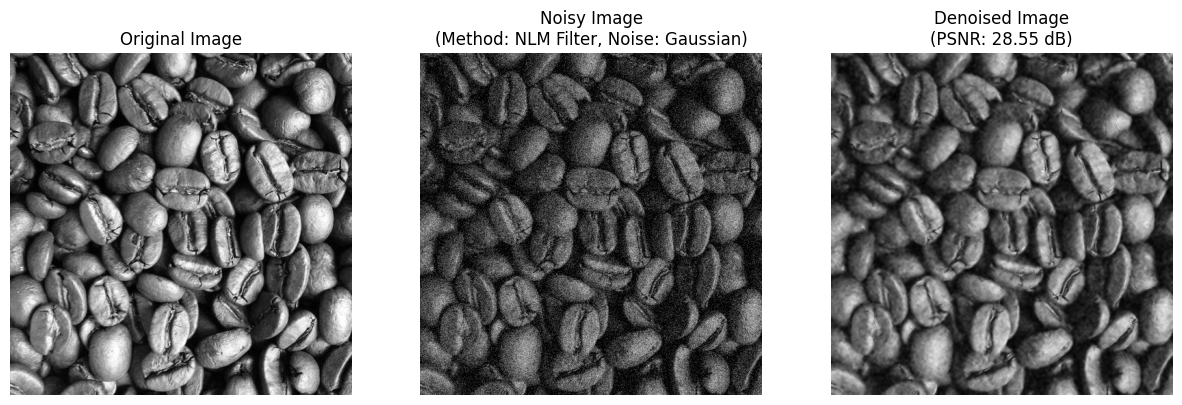

In [21]:
import numpy as np
import csv
from itertools import product

def evaluate_denoising(h, templateWindowSize, searchWindowSize):
    # Apply the NLM filter with the given hyperparameters
    denoised_image = denoiser.denoise_with_nonlocal_means(
        h=h,
        templateWindowSize=templateWindowSize,
        searchWindowSize=searchWindowSize
    )
    
    # Calculate PSNR as the performance metric
    psnr_value = helper_func.calculate_psnr(denoised_image, image)  # Adjust original_image as needed
    return psnr_value

# Define ranges for hyperparameters
h_values = list(range(10, 100, 10))  # Generates [10, 20, 30, ..., 90]
template_window_sizes = list(range(5, 21, 2))  # Generates [5, 7, 9, ..., 19]
search_window_sizes = list(range(5, 11, 2))  # Generates [5, 7, 9]

best_psnr = -np.inf
best_params = None

# Open a CSV file to write PSNR values
with open('nlm_psnr_results.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    csvwriter = csv.writer(csvfile)
    
    # Write header
    csvwriter.writerow(["h", "Template Window Size", "Search Window Size", "PSNR"])
    
    # Generate combinations of all hyperparameters using itertools.product
    for h, templateWindowSize, searchWindowSize in product(h_values, template_window_sizes, search_window_sizes):
        psnr_value = evaluate_denoising(h, templateWindowSize, searchWindowSize)
        
        # Write the current configuration and PSNR to the file
        csvwriter.writerow([h, templateWindowSize, searchWindowSize, psnr_value])
        
        # Update best PSNR and parameters
        if psnr_value > best_psnr:
            best_psnr = psnr_value
            best_params = (h, templateWindowSize, searchWindowSize)

# Output the best PSNR and parameters
print(f"Best PSNR: {best_psnr:.2f} dB")
print(f"Best Parameters: h={best_params[0]}, templateWindowSize={best_params[1]}, searchWindowSize={best_params[2]}")

# Use the best parameters to denoise the image
h = best_params[0]
templateWindowSize = best_params[1]
searchWindowSize = best_params[2]
method_name = "NLM Filter"
noise_type = "Gaussian"

# Denoise the image with the best parameters
denoised_nonlocal_means = denoiser.denoise_with_nonlocal_means(h=h, templateWindowSize=templateWindowSize, searchWindowSize=searchWindowSize)

# Plot the images
helper_func.plot_images(original=image, noisy=noisy_image, denoised_image=denoised_nonlocal_means, method_name=method_name, noise_type=noise_type)
